# Newsarticles EDA
*by Rosana de Oliveira Gomes*

Collecting newsarticles from worlwide to analyze their content and representativity of the data for floods and droughts.

In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

## Loading the data

Getting data from the merged newspapers dataset:

In [2]:
df_raw = pd.read_csv('labelled_data/merged_labeled_newspaper_data.csv')

print(f"shape of dataframe: {df_raw.shape}")

df_raw.head()

shape of dataframe: (4566, 20)


,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,Unnamed: 10,category,Country,Unnamed: 11,Unnamed: 9,Category,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,DR-2021-000022-AFG,"After drought and floods, Afghanistan confront...",https://www.reuters.com/article/us-afghanistan...,"KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","Wed, 27 Mar 2019 07:00:00 GMT",https://static.reuters.com/resources/r/?m=02&d...,"['displaced', 'food', 'lanzer', 'representativ...",,NaN,flood_drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,DR-2021-000022-AFG,"500,000 children affected by drought in Afghan...",https://www.unicef.org/press-releases/500000-c...,"KABUL, 23 April 2018 â The extremely dry win...","Mon, 23 Apr 2018 07:00:00 GMT",https://www.unicef.org/themes/custom/unicef_ba...,"['malnutrition', 'water', 'affected', 'drought...",,NaN,flood_drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,DR-2021-000022-AFG,Afghanistan: Drought - 2018-2019 - ReliefWeb,https://reliefweb.int/disaster/dr-2018-000052-afg,La NiÃ±a has had a devastating effect on this ...,"Tue, 15 May 2018 09:34:06 GMT",https://reliefweb.int/apple-touch-icon.png,"['food', 'ipc', 'households', 'affected', 'dro...",,NaN,drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DR-2021-000022-AFG,"War, drought, diplomatic rifts deepen Afghanis...",https://www.aljazeera.com/features/2019/5/5/wa...,Worst drought in a decade highlights poor infr...,"Sun, 05 May 2019 07:00:00 GMT",https://www.aljazeera.com/wp-content/uploads/2...,"['rifts', 'war', 'afghanistans', 'water', 'dam...",,NaN,drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,DR-2021-000022-AFG,'The country could fall apart': drought and de...,https://www.theguardian.com/global-development...,Shafiqa watches closely over her six-month-old...,"Mon, 25 Mar 2019 07:00:00 GMT",https://i.guim.co.uk/img/media/26284f9ae5aa849...,"['malnutrition', 'apart', 'food', 'hospital', ...",,NaN,none,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_raw.columns


Index(['Unnamed: 0', 'event_id', 'article_title', 'article_link',
       'article_content', 'publishing_date', 'article_image',
       'article_keywords', 'article_relevance', 'Unnamed: 10', 'category',
       'Country', 'Unnamed: 11', 'Unnamed: 9', 'Category', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [4]:
df_raw = df_raw.drop(columns=['Unnamed: 0', 'article_link', 'article_image',  'Unnamed: 9',  'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Category'])

df_raw.head()

,event_id,article_title,article_content,publishing_date,article_keywords,article_relevance,category,Country
0,DR-2021-000022-AFG,"After drought and floods, Afghanistan confront...","KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","Wed, 27 Mar 2019 07:00:00 GMT","['displaced', 'food', 'lanzer', 'representativ...",,flood_drought,Afghanista
1,DR-2021-000022-AFG,"500,000 children affected by drought in Afghan...","KABUL, 23 April 2018 â The extremely dry win...","Mon, 23 Apr 2018 07:00:00 GMT","['malnutrition', 'water', 'affected', 'drought...",,flood_drought,Afghanista
2,DR-2021-000022-AFG,Afghanistan: Drought - 2018-2019 - ReliefWeb,La NiÃ±a has had a devastating effect on this ...,"Tue, 15 May 2018 09:34:06 GMT","['food', 'ipc', 'households', 'affected', 'dro...",,drought,Afghanista
3,DR-2021-000022-AFG,"War, drought, diplomatic rifts deepen Afghanis...",Worst drought in a decade highlights poor infr...,"Sun, 05 May 2019 07:00:00 GMT","['rifts', 'war', 'afghanistans', 'water', 'dam...",,drought,Afghanista
4,DR-2021-000022-AFG,'The country could fall apart': drought and de...,Shafiqa watches closely over her six-month-old...,"Mon, 25 Mar 2019 07:00:00 GMT","['malnutrition', 'apart', 'food', 'hospital', ...",,none,Afghanista


## Text Cleaning
Steps for typical NLP preprocessing to be applied to the title and summary of service opportunities.

Let's start with importing relevant NLP libraries:

In [5]:
import contractions
import string
import nltk
import regex as re
from datetime import datetime
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from spellchecker import SpellChecker
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /home/rosana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/rosana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/rosana/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/rosana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
# Preprocessing function

def text_preprocessing(text, spelling=False):
    '''
    NLP preprocessing steps in a given dataframe and returns a preprocessed dataframe
    1. Remove contractions
    2. Tokenization
    3. Lowercasing
    4. Remove punctuation
    5. Remove stopwords
    6. Replace misspelled words
    7. Lemmatization
    
    Arguments:
    `descriptions`: descriptions to be preprocessed
    '''
    
    # 
    
    # Make sure we have a column of a data frame as input
    text = pd.Index(text).fillna('')
    
    # 1. Removing contractions
    preprocessed = text.map(lambda x: [contractions.fix(word) for word in x.split()])
    preprocessed = preprocessed.map(lambda x: ' '.join(w for w in x))
    
    # 2. Tokenization
    preprocessed = preprocessed.map(word_tokenize)
    
    # 3. Set all words to lower case
    preprocessed = preprocessed.map(lambda x: [word.lower() for word in x])
    
    # 4. Remove punctuation
    punc = string.punctuation
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in punc])
    
    # 5. Remove stopwords
    stop_words = set(stopwords.words('english'))
    preprocessed = preprocessed.map(lambda x: [word for word in x if word not in stop_words])
    
    # 6. Replace misspelling
    if spelling:
        spell = SpellChecker()
        preprocessed = preprocessed.map(lambda x: [spell.correction(word) for word in x])
  
    # 7. Lemmatization
    
    preprocessed = preprocessed.map(nltk.tag.pos_tag)

    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    preprocessed = preprocessed.map(lambda x: [(word, get_wordnet_pos(pos_tag)) 
                                               for (word, pos_tag) in x])
    
    wnl = WordNetLemmatizer()
    preprocessed = preprocessed.map(lambda x: [wnl.lemmatize(word, tag) 
                                               for word, tag in x])
#    now = datetime.now()

#    print("Current Time =", now)
    return preprocessed


In [7]:
# Testing function

df_content = pd.DataFrame()
df_content['article_content'] = df_raw['article_content'] 

%time df_content['content_preprocessed'] = text_preprocessing(df_content['article_content'])

CPU times: user 1min 46s, sys: 902 ms, total: 1min 47s
Wall time: 1min 47s


In [8]:
df_content

,article_content,content_preprocessed
0,"KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","[kabul/mazar-i-sharif, afghanistan, reuters, a..."
1,"KABUL, 23 April 2018 â The extremely dry win...","[kabul, 23, april, 2018, â, extremely, dry, ..."
2,La NiÃ±a has had a devastating effect on this ...,"[la, niã±a, devastate, effect, yearâs, plant..."
3,Worst drought in a decade highlights poor infr...,"[worst, drought, decade, highlight, poor, infr..."
4,Shafiqa watches closely over her six-month-old...,"[shafiqa, watch, closely, six-month-old, niece..."
...,...,...
4561,"Cyclone Amphan induces high, rough tides at Ka...","[cyclone, amphan, induces, high, rough, tide, ..."
4562,A poor start to the rainy season has resulted ...,"[poor, start, rainy, season, result, abnormal,..."
4563,Situation analysis\n\nDescription of the disas...,"[situation, analysis, description, disaster, s..."
4564,A man attempts to fend-off a swarm of desert l...,"[man, attempt, fend-off, swarm, desert, locust..."


In [9]:
df_title = pd.DataFrame()
df_title['article_title'] = df_raw['article_title']
%time df_title['title_preprocessed'] = text_preprocessing(df_title['article_title'])

CPU times: user 3.72 s, sys: 44 ms, total: 3.76 s
Wall time: 3.77 s


In [10]:
df_title

,article_title,title_preprocessed
0,"After drought and floods, Afghanistan confront...","[drought, flood, afghanistan, confronts, criti..."
1,"500,000 children affected by drought in Afghan...","[500,000, child, affect, drought, afghanistan,..."
2,Afghanistan: Drought - 2018-2019 - ReliefWeb,"[afghanistan, drought, 2018-2019, reliefweb]"
3,"War, drought, diplomatic rifts deepen Afghanis...","[war, drought, diplomatic, rift, deepen, afgha..."
4,'The country could fall apart': drought and de...,"['the, country, could, fall, apart, drought, d..."
...,...,...
4561,2020 Rewind: Five Major Disasters That Wreaked...,"[2020, rewind, five, major, disaster, wreak, h..."
4562,Global Weather Hazards Summary: December 04-10...,"[global, weather, hazard, summary, december, 0..."
4563,"Kenya: Floods - Emergency Plan of Action, DREF...","[kenya, flood, emergency, plan, action, dref, ..."
4564,"New Wave of Locust, Severe Floods Threaten Eas...","[new, wave, locust, severe, flood, threaten, e..."


In [37]:
df_newspapers = df_raw.copy()

df_newspapers['content_preprocessed'] = df_content['content_preprocessed'] 
df_newspapers['title_preprocessed'] = df_title['title_preprocessed'] 

df_newspapers

,event_id,article_title,article_content,publishing_date,article_keywords,article_relevance,category,Country,content_preprocessed,title_preprocessed
0,DR-2021-000022-AFG,"After drought and floods, Afghanistan confront...","KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","Wed, 27 Mar 2019 07:00:00 GMT","['displaced', 'food', 'lanzer', 'representativ...",,flood_drought,Afghanista,"[kabul/mazar-i-sharif, afghanistan, reuters, a...","[drought, flood, afghanistan, confronts, criti..."
1,DR-2021-000022-AFG,"500,000 children affected by drought in Afghan...","KABUL, 23 April 2018 â The extremely dry win...","Mon, 23 Apr 2018 07:00:00 GMT","['malnutrition', 'water', 'affected', 'drought...",,flood_drought,Afghanista,"[kabul, 23, april, 2018, â, extremely, dry, ...","[500,000, child, affect, drought, afghanistan,..."
2,DR-2021-000022-AFG,Afghanistan: Drought - 2018-2019 - ReliefWeb,La NiÃ±a has had a devastating effect on this ...,"Tue, 15 May 2018 09:34:06 GMT","['food', 'ipc', 'households', 'affected', 'dro...",,drought,Afghanista,"[la, niã±a, devastate, effect, yearâs, plant...","[afghanistan, drought, 2018-2019, reliefweb]"
3,DR-2021-000022-AFG,"War, drought, diplomatic rifts deepen Afghanis...",Worst drought in a decade highlights poor infr...,"Sun, 05 May 2019 07:00:00 GMT","['rifts', 'war', 'afghanistans', 'water', 'dam...",,drought,Afghanista,"[worst, drought, decade, highlight, poor, infr...","[war, drought, diplomatic, rift, deepen, afgha..."
4,DR-2021-000022-AFG,'The country could fall apart': drought and de...,Shafiqa watches closely over her six-month-old...,"Mon, 25 Mar 2019 07:00:00 GMT","['malnutrition', 'apart', 'food', 'hospital', ...",,none,Afghanista,"[shafiqa, watch, closely, six-month-old, niece...","['the, country, could, fall, apart, drought, d..."
...,...,...,...,...,...,...,...,...,...,...
4561,http://floodlist.com/africa/kenya-floods-may-2021,2020 Rewind: Five Major Disasters That Wreaked...,"Cyclone Amphan induces high, rough tides at Ka...","Thu, 31 Dec 2020 08:00:00 GMT","['worldwide', 'disasters', 'million', 'lakh', ...",,none,Kenya,"[cyclone, amphan, induces, high, rough, tide, ...","[2020, rewind, five, major, disaster, wreak, h..."
4562,http://floodlist.com/africa/kenya-floods-may-2021,Global Weather Hazards Summary: December 04-10...,A poor start to the rainy season has resulted ...,"Sat, 05 Dec 2020 08:00:00 GMT","['start', 'rainfall', 'weather', 'summary', 'p...",,flood,Kenya,"[poor, start, rainy, season, result, abnormal,...","[global, weather, hazard, summary, december, 0..."
4563,http://floodlist.com/africa/kenya-floods-may-2021,"Kenya: Floods - Emergency Plan of Action, DREF...",Situation analysis\n\nDescription of the disas...,"Tue, 29 Oct 2019 07:00:00 GMT","['iod', 'n', 'rainfall', 'positive', 'heavy', ...",,none,Kenya,"[situation, analysis, description, disaster, s...","[kenya, flood, emergency, plan, action, dref, ..."
4564,http://floodlist.com/africa/kenya-floods-may-2021,"New Wave of Locust, Severe Floods Threaten Eas...",A man attempts to fend-off a swarm of desert l...,"Wed, 06 May 2020 07:00:00 GMT","['africas', 'locust', 'swarm', 'food', 'threat...",,none,Kenya,"[man, attempt, fend-off, swarm, desert, locust...","[new, wave, locust, severe, flood, threaten, e..."


## Exploratory Data Analysis (EDA)
Verifying most common words or combinations of words (ngrams) per category, in order to check if the pre-determined keywords seem valid for the dataset.

In [38]:
import matplotlib.pyplot as plt
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [39]:
set(df_newspapers['category'])

{' ',
 'Drought',
 'Flood',
 'Flood_and_Drought',
 'Main responsibilities:',
 'Tree',
 'climate_change',
 'drought',
 'drought, flood',
 'drought,flood',
 'fldood',
 'flood',
 'flood - drought',
 'flood_and_drought',
 'flood_drought',
 'floood',
 'missing',
 nan,
 'nnone',
 'none',
 'tree'}

In [55]:
set(df_newspapers['Country'])

{'Afghanista',
 'Brazil',
 'Canada',
 'China',
 'Egpyt',
 'Egypt',
 'Ghana',
 'India',
 'Iran',
 'Kenya',
 'Mozambique',
 'Nigeria',
 'Pakistan',
 'Somalia',
 'Sri Lanka',
 'Uganda',
 'Vietnam'}

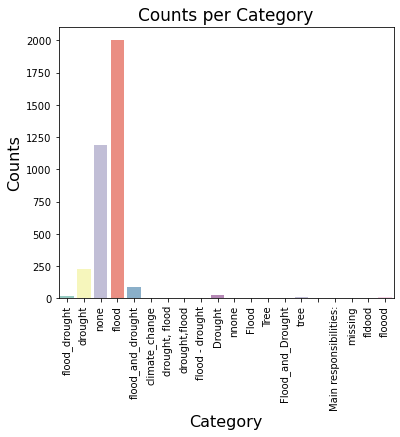

In [57]:
fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data = df_newspapers,
               x= 'category',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Counts per Category', fontsize= 17)
ax.set_ylabel('Counts', fontsize=16);
ax.set_xlabel('Category', fontsize=16);

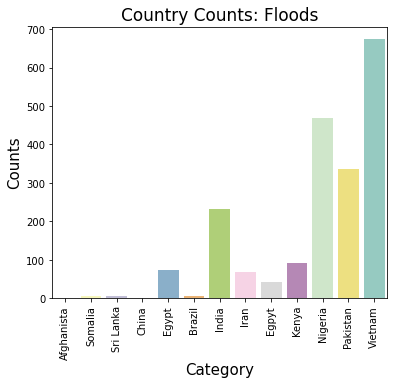

In [53]:
data_filter = df_newspapers[df_newspapers['category']=='flood']

fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data = data_filter,
               x= 'Country',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Country Counts: Floods', fontsize= 17)
ax.set_ylabel('Counts', fontsize=15);
ax.set_xlabel('Category', fontsize=15);

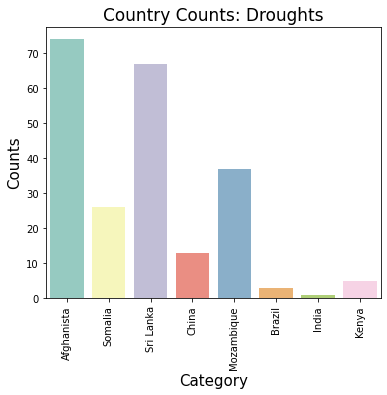

In [54]:
data_filter = df_newspapers[df_newspapers['category']=='drought']

fig, ax = plt.subplots(figsize=(6,5))
sns.countplot(data = data_filter,
               x= 'Country',
               palette = "Set3",
               orient = 'h').set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title('Country Counts: Droughts', fontsize= 17)
ax.set_ylabel('Counts', fontsize=15);
ax.set_xlabel('Category', fontsize=15);

In [41]:
def plot_top_keywords_barchart(text, title, n=1):
    ''' Generate plot of top keywords.
    
    Arguments:
    text: column from pandas dataframe
    title: string for plot title
    n: number of words in ngram'''
    
    
    stop = set(stopwords.words('english'))
        
    text = pd.Index(text).dropna()
    
    new = text.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_keywords=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_keywords))
    plt.figure(figsize=(10,10))
    plt.title(title)
    plt.xlabel("Keywords Frequency")
    plt.ylabel("Top 20 Keywords mentioned in Newsarticles")
    sns.barplot(x=y,y=x)

In [42]:
df_newspapers["title_preprocessed"] = [' '.join(map(str, l)) for l in df_newspapers['title_preprocessed']]
df_newspapers["content_preprocessed"] = [' '.join(map(str, l)) for l in df_newspapers['content_preprocessed']]

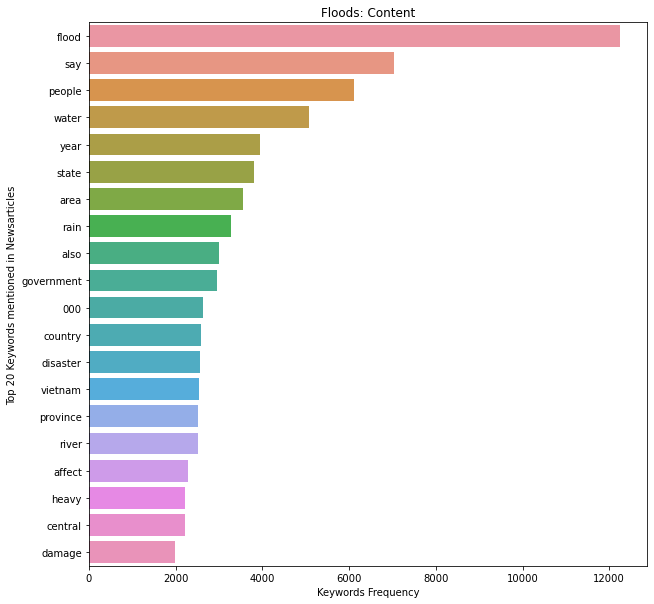

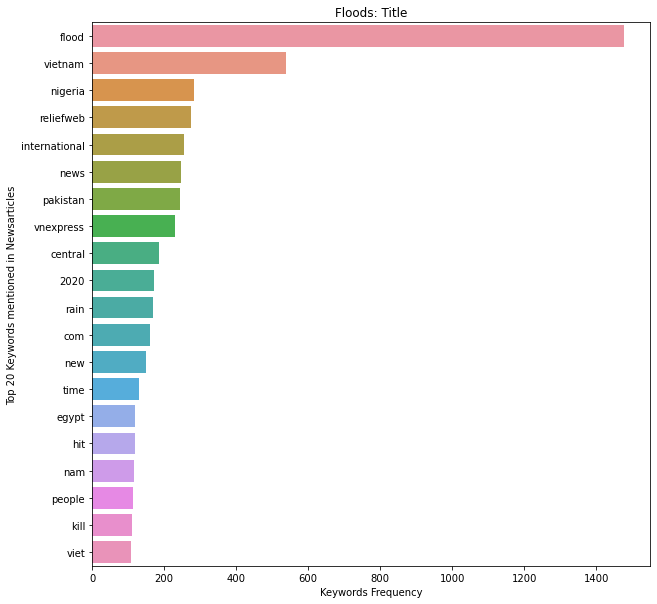

In [59]:
# # Flood keywords
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='flood']['content_preprocessed'], 'Floods: Content', 1)
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='flood']['title_preprocessed'], 'Floods: Title', 1)

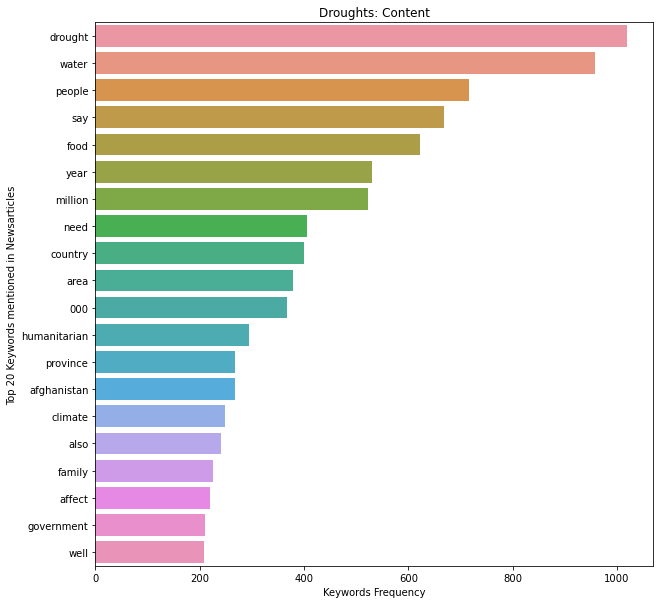

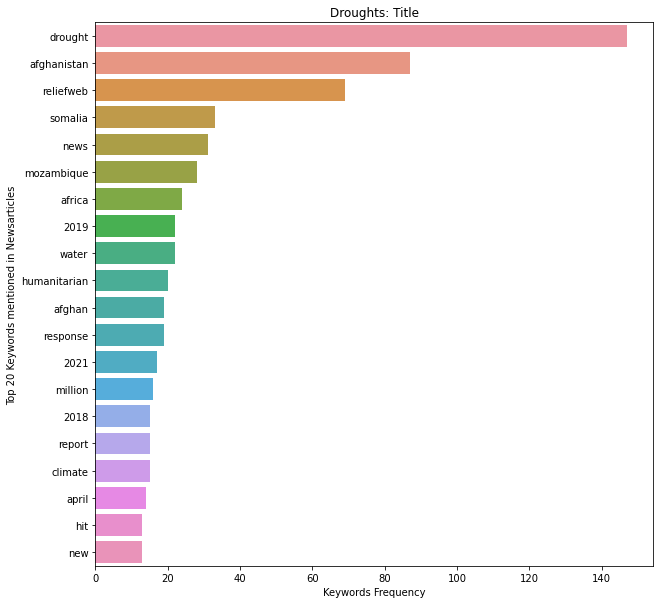

In [58]:
#Drought keywords
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='drought']['content_preprocessed'], 'Droughts: Content', 1)
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='drought']['title_preprocessed'], 'Droughts: Title', 1)

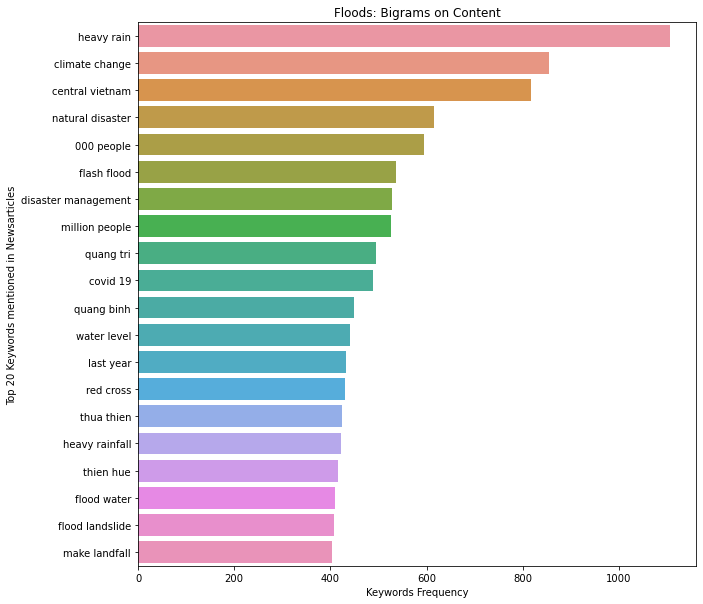

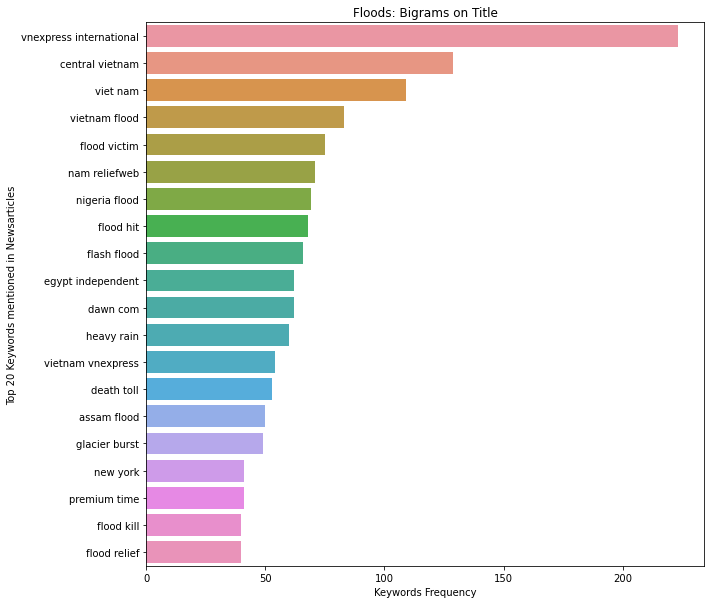

In [60]:
# Flood Bigrams
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='flood']['content_preprocessed'], 'Floods: Bigrams on Content', 2)
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='flood']['title_preprocessed'], 'Floods: Bigrams on Title', 2)

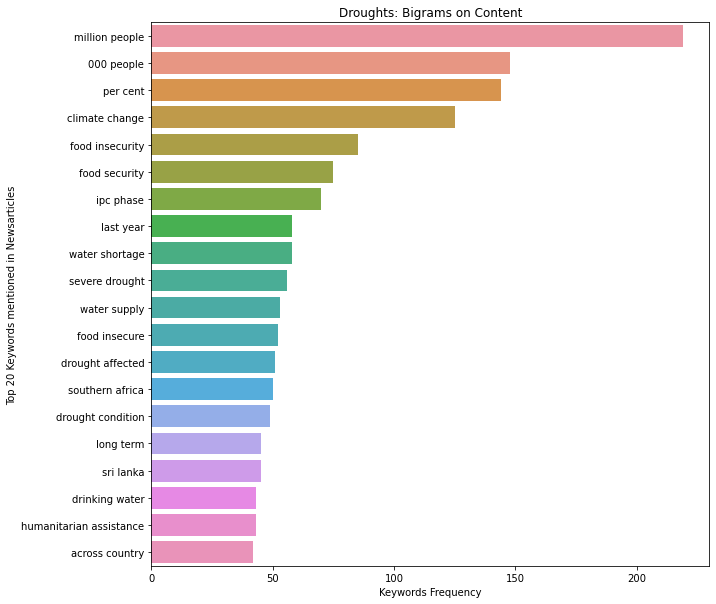

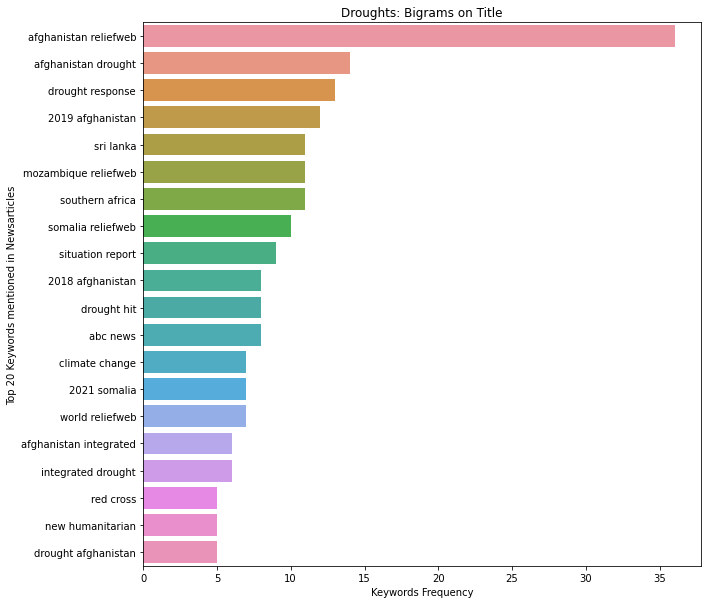

In [63]:
# Droughts Bigrams
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='drought']['content_preprocessed'], 'Droughts: Bigrams on Content', 2)
plot_top_keywords_barchart(df_newspapers[df_newspapers['category']=='drought']['title_preprocessed'], 'Droughts: Bigrams on Title', 2)

In [66]:
def wordcloud(sentence, title):

    stopword = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white", max_words=2000, stopwords=stopword, 
                          contour_width=1).generate(' '.join(sentence))   

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    


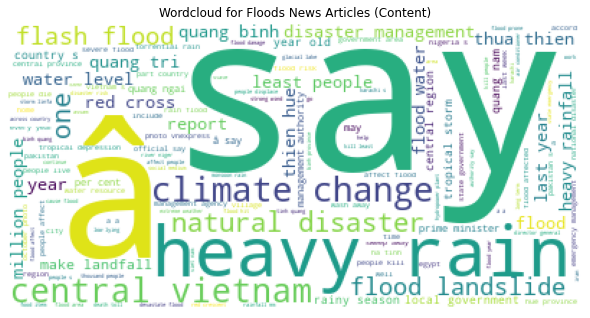

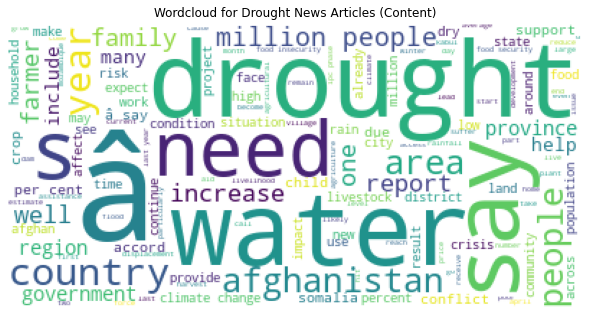

In [68]:
df_filter = df_newspapers[df_newspapers['category']=='flood']['content_preprocessed']
wordcloud(df_filter, 'Wordcloud for Floods News Articles (Content)')

df_filter = df_newspapers[df_newspapers['category']=='drought']['content_preprocessed']
wordcloud(df_filter, 'Wordcloud for Drought News Articles (Content)')

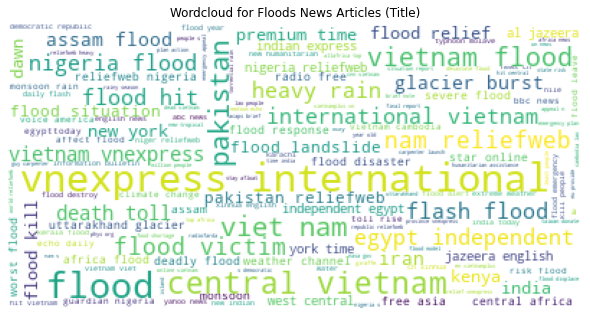

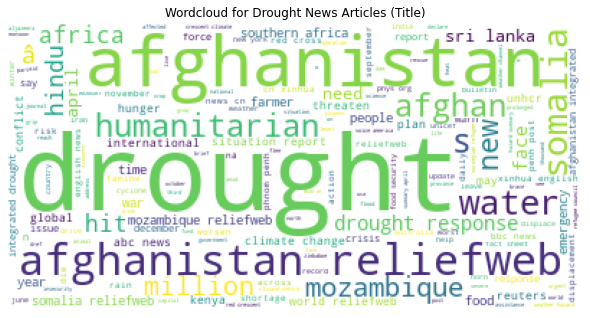

In [69]:
df_filter = df_newspapers[df_newspapers['category']=='flood']['title_preprocessed']
wordcloud(df_filter, 'Wordcloud for Floods News Articles (Title)')

df_filter = df_newspapers[df_newspapers['category']=='drought']['title_preprocessed']
wordcloud(df_filter, 'Wordcloud for Drought News Articles (Title)')

## Next steps

* Update analysis to dataset with more Droughts articles
* Extend analysis to other social media data sources

